## Setup

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as rp

In [ ]:
warnings.filterwarnings("ignore")
start = '2008-01-01'
end = '2022-01-28'

In [ ]:
df = pd.read_excel('ticker.xlsx')
df.sort_values(by=['Ticker'], inplace=True)
df

,Ticker,Classe1,Classe2,Classe3,Nome
27,BR50.MI,Azioni,Azionario EM,Azionario globale,iShares BRIC 50 UCITS ETF
15,CHIP.PA,Azioni,Azionario tematico,Azionario tematico,Lyxor MSCI Semiconductors ESG
31,DBX0.DE,Fondo/etf,Globale,Globale,Xtrackers - Portfolio UCITS ETF
25,DBX2.DE,Azioni,Azionario asia,Azionario globale,Xtrackers MSCI EM Asia Swap UCITS ETF 1C
9,DJSC.MI,Azioni,Azionario europeo,Azionario globale,iShares EURO STOXX Small UCITS ETF
13,EMKT.MI,Azioni,Azionario EM,Globale,Lyxor MSCI Emerging Markets
8,EUN.MI,Azioni,Azionario europeo,Azionario globale,iShares STOXX Europe 50 UCITS ETF
7,EXSA.MI,Azioni,Azionario europeo,Azionario globale,iShares STOXX Europe 600
1,EXXY.MI,Commodities,Commodities,Commodities,iShares Diversified Commodity Swap
0,GBS.MI,Commodities,Oro,Oro,Gold


In [ ]:
ticker=df['Ticker'].values.tolist()
ticker
classe1=df['Classe1'].values.tolist()
classe2=df['Classe2'].tolist()
nome=df['Nome'].tolist()

In [ ]:
data = yf.download(ticker, start=start, end=end,period='5d')
data = data.loc[:,('Adj Close', slice(None))]
data.columns=nome

[*********************100%***********************]  33 of 33 completed


In [ ]:
Y = data[nome].pct_change().dropna()
Y

,iShares BRIC 50 UCITS ETF,Lyxor MSCI Semiconductors ESG,Xtrackers - Portfolio UCITS ETF,Xtrackers MSCI EM Asia Swap UCITS ETF 1C,iShares EURO STOXX Small UCITS ETF,Lyxor MSCI Emerging Markets,iShares STOXX Europe 50 UCITS ETF,iShares STOXX Europe 600,iShares Diversified Commodity Swap,Gold,...,Invesco FTSE RAFI US 1000,iShares 20+ Year Treasury Bond ETF,Lyxor Nasdaq-100,Lyxor MSCI World,Eurozone Government Bond 15-30,Global Inflation-Linked Bond,Private Equity Swap,MSCI USA Swap UCITS ETF,Nifty 50 Swap,S&P Select Frontier
Date,,,,,,,,,,,,,,,,,,,,,
2008-11-28,-0.004975,0.044888,0.009128,0.010551,-0.013663,0.037471,0.008057,0.000000,0.000000,0.000000,...,0.016472,0.012353,0.000000,0.007916,0.000824,-0.000489,0.016313,0.009038,0.011434,-0.004127
2008-12-01,-0.004167,0.016706,-0.018278,0.004795,-0.004617,0.017813,0.010813,-0.012089,-0.005727,0.007929,...,-0.092811,0.038296,0.008043,0.018034,0.006531,0.006501,-0.031300,0.012156,-0.004946,0.037293
2008-12-02,-0.063598,0.018779,-0.000314,-0.038637,-0.009278,-0.053108,-0.064186,0.000000,-0.034562,-0.042703,...,0.044820,0.003839,-0.071809,-0.064000,0.015608,0.011181,-0.019055,-0.053729,0.000473,-0.017310
2008-12-03,0.020554,-0.050691,0.003919,0.006001,-0.006689,0.014659,0.022366,0.000000,0.000000,0.022975,...,0.027355,0.002824,0.025788,0.013889,0.018418,0.003777,0.012669,0.005344,0.020582,-0.006775
2008-12-04,0.007005,-0.014563,-0.004874,-0.000906,0.034343,0.005025,0.004861,0.000000,0.000000,-0.020164,...,-0.025114,0.019704,0.033520,0.035376,0.005595,0.009921,-0.025855,0.036545,0.029671,0.009550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21,-0.033874,-0.028179,-0.017778,-0.020798,-0.018892,-0.020506,-0.014586,-0.019271,-0.004874,-0.003909,...,-0.014620,0.011906,-0.031567,-0.022022,0.000530,0.000039,-0.025808,-0.024293,-0.014056,-0.011303
2022-01-24,0.000000,-0.049452,-0.023529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003860,-0.008216,-0.053247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-25,0.000000,0.005975,0.005746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.002944,-0.001615,0.009767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Media Varianza senza vincoli

In [ ]:
port = rp.Portfolio(returns=Y)
method_mu='hist'
method_cov='hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

w_sharpe1 = port.optimization(model='Classic', rm='MV', obj='Sharpe', rf=0.00006, l=0, hist=True)


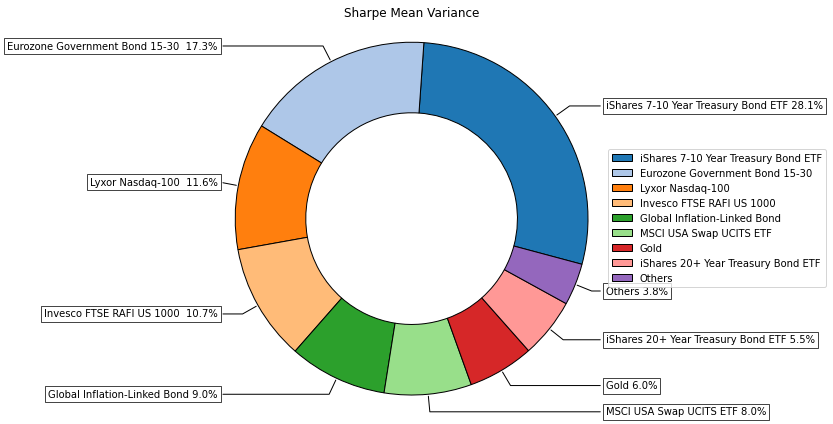

In [ ]:
ax = rp.plot_pie(w=w_sharpe1, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

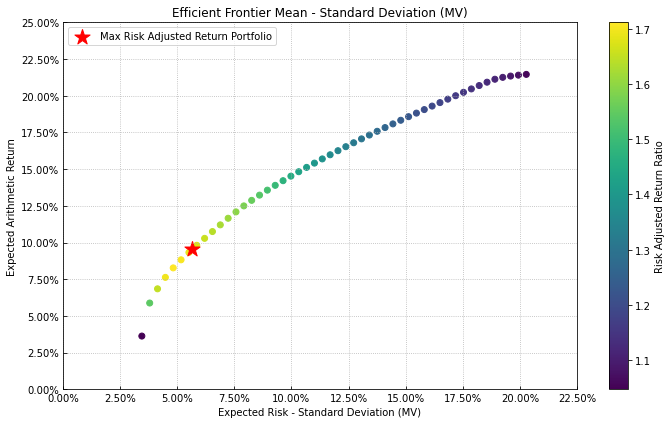

In [ ]:
points = 50 
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0.00006 # Risk free rate
l = 0
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets


ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_sharpe1, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

## cVar

In [ ]:
port = rp.Portfolio(returns=Y)
method_mu='hist'
method_cov='hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

w_cvar1 = port.optimization(model='Classic', rm='CVaR', obj='Sharpe', rf=0.00006, l=0, hist=True)

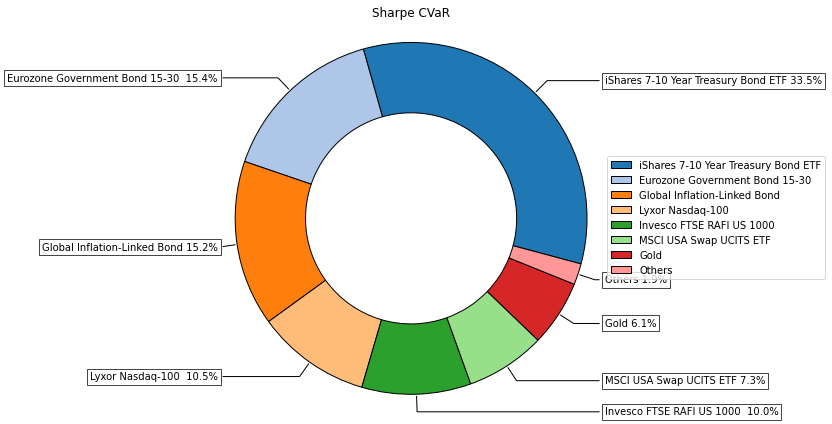

In [ ]:
ax = rp.plot_pie(w=w_cvar1, title='Sharpe CVaR', others=0.03, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

## Constraints

In [ ]:
df1 = pd.read_excel('ticker.xlsx')
df1 = df1.sort_values(by=['Ticker'])
constraints= pd.read_excel('const.xlsx',na_filter=False)


In [ ]:
df1= df1[ [ col for col in df1.columns if col != 'Ticker' ] + ['Ticker']]

df1= df1[ ['Nome'] + [ col for col in df1.columns if col != 'Nome' ]]

df1.drop('Ticker', axis=1, inplace=True)
df1.rename(columns={'Nome': 'Assets'}, inplace=True)


In [ ]:
constraints

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Assets,,Lyxor Nasdaq-100,<=,0.00,,,,
1,False,Classes,Classe3,ObbligazioniUS,<=,0.30,,,,
2,False,Classes,Classe3,Commodities,>=,0.02,,,,
3,False,Classes,Classe2,Azionario globale,>=,0.05,,,,
4,False,Classes,Classe2,Azionario tematico,>=,0.05,,,,


In [ ]:
A, B = rp.assets_constraints(constraints, df1)

In [ ]:
df1

,Assets,Classe1,Classe2,Classe3
27,iShares BRIC 50 UCITS ETF,Azioni,Azionario EM,Azionario globale
15,Lyxor MSCI Semiconductors ESG,Azioni,Azionario tematico,Azionario tematico
31,Xtrackers - Portfolio UCITS ETF,Fondo/etf,Globale,Globale
25,Xtrackers MSCI EM Asia Swap UCITS ETF 1C,Azioni,Azionario asia,Azionario globale
9,iShares EURO STOXX Small UCITS ETF,Azioni,Azionario europeo,Azionario globale
13,Lyxor MSCI Emerging Markets,Azioni,Azionario EM,Globale
8,iShares STOXX Europe 50 UCITS ETF,Azioni,Azionario europeo,Azionario globale
7,iShares STOXX Europe 600,Azioni,Azionario europeo,Azionario globale
1,iShares Diversified Commodity Swap,Commodities,Commodities,Commodities
0,Gold,Commodities,Oro,Oro


In [ ]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'CVaR'
obj = 'Sharpe'
rf = 0

w_personale = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)


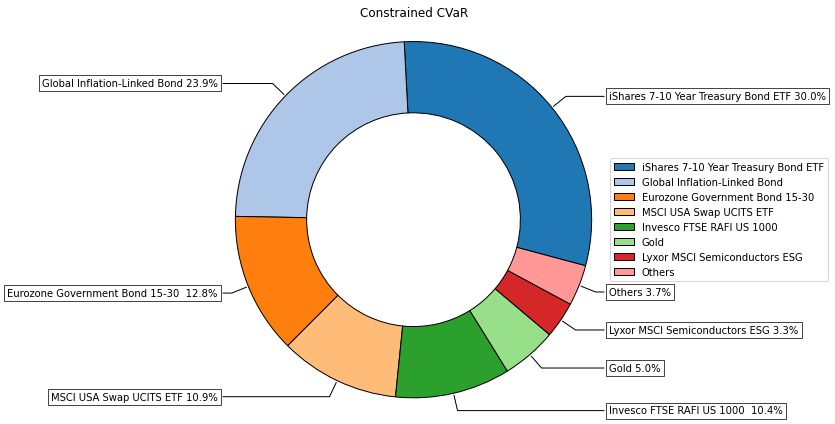

In [ ]:
ax = rp.plot_pie(w=w_personale, title='Constrained CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

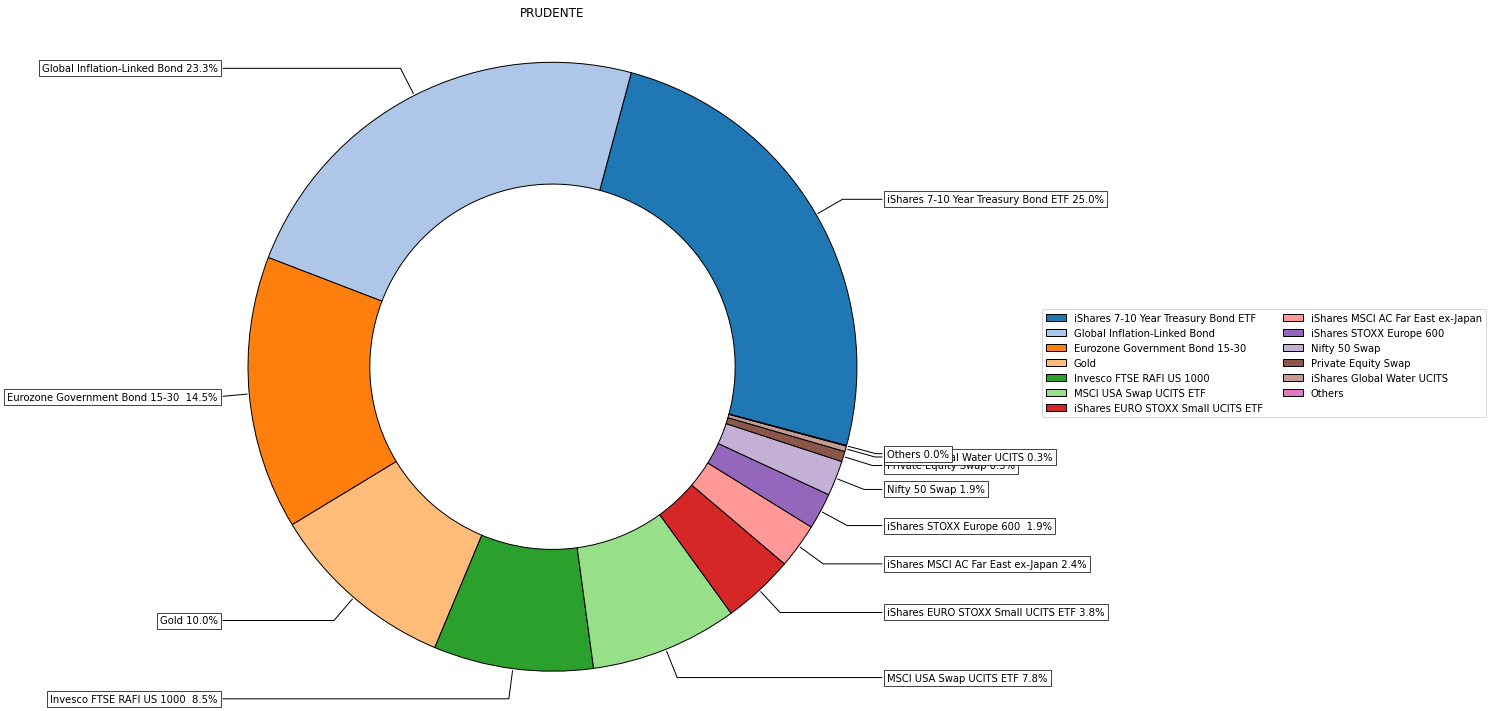

In [ ]:
constraints= pd.read_excel('prudente.xlsx',na_filter=False)
port = rp.Portfolio(returns=Y)

method_mu='hist'
method_cov='hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

A, B = rp.assets_constraints(constraints, df1)
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'CVaR'
obj = 'Utility'
rf = 0


w_prudente = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=0.05, hist=hist)
ax = rp.plot_pie(w=w_prudente, title='PRUDENTE', others=0.002, nrow=10, cmap = "tab20",
                 height=10, width=20, ax=None)

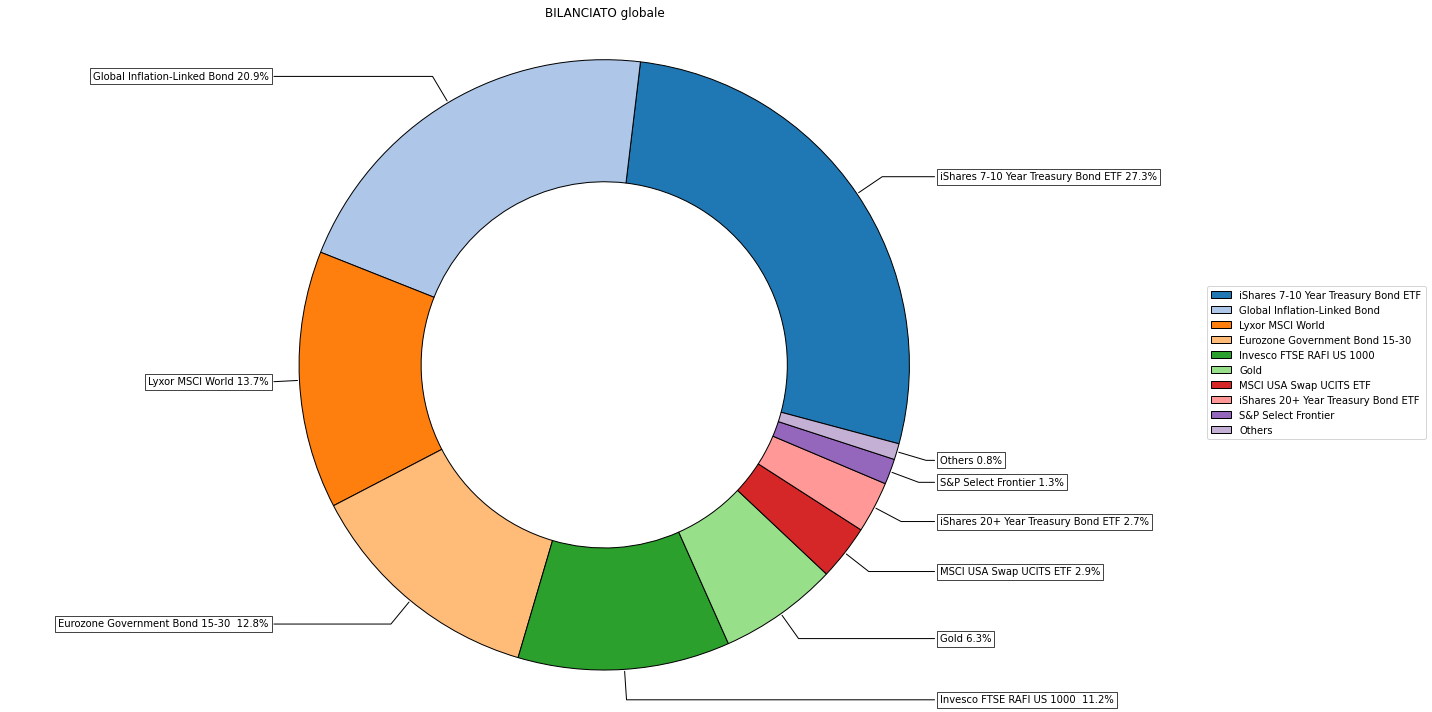

In [ ]:
constraints= pd.read_excel('moderato.xlsx',na_filter=False)
port = rp.Portfolio(returns=Y)

method_mu='hist'
method_cov='hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

A, B = rp.assets_constraints(constraints, df1)
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'CVaR'
obj = 'Sharpe'
rf = 0


w_moderato = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
ax = rp.plot_pie(w=w_moderato, title='BILANCIATO globale', others=0.01, nrow=10, cmap = "tab20",
                 height=10, width=20, ax=None)

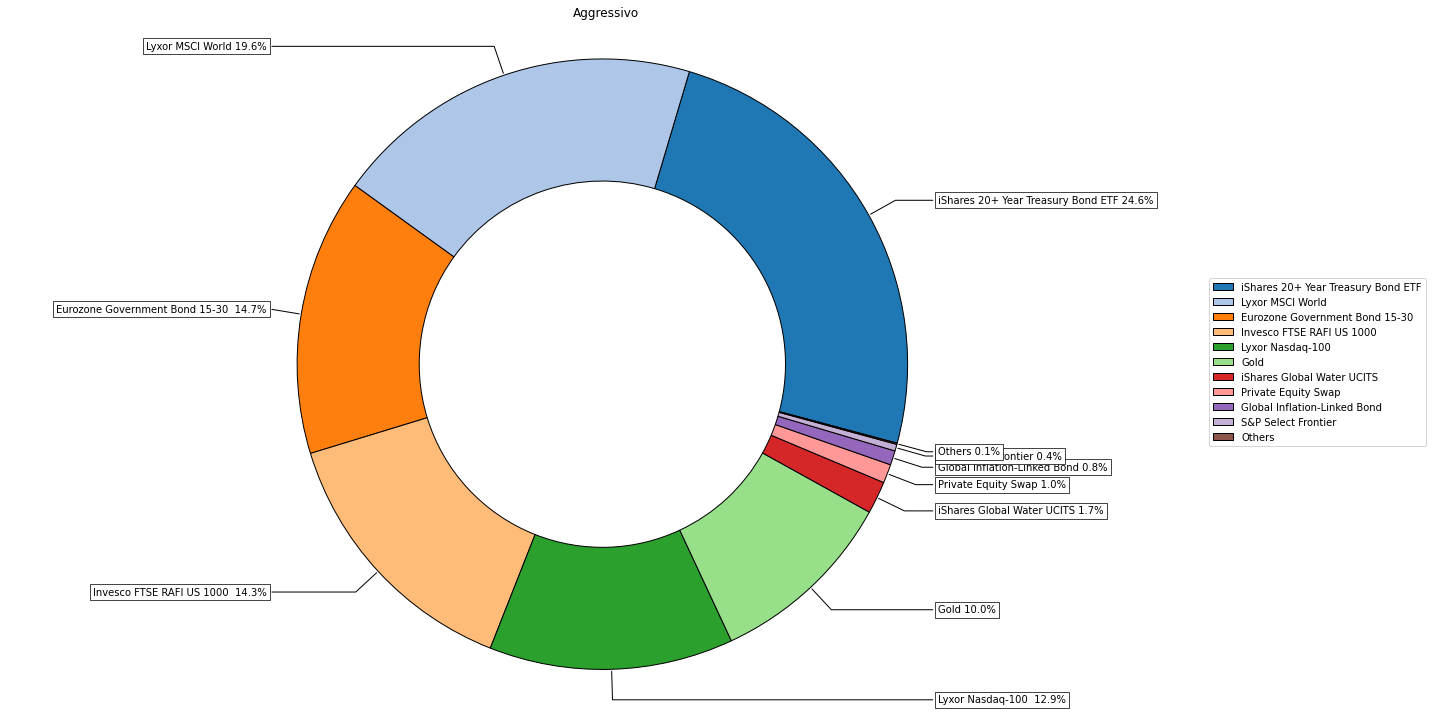

In [ ]:
constraints= pd.read_excel('aggressivo.xlsx',na_filter=False)
port = rp.Portfolio(returns=Y)

method_mu='hist'
method_cov='hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

A, B = rp.assets_constraints(constraints, df1)
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'CVaR'
obj = 'Sharpe'
rf = 0

w_aggressivo = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=0.025, hist=hist)
ax = rp.plot_pie(w=w_aggressivo, title='Aggressivo', others=0.001, nrow=10, cmap = "tab20",
                 height=10, width=20, ax=None)

# Backtesting

In [ ]:
import bt

In [ ]:
def varname(variable):
    for name in list(globals().keys()):
        expression = f'id({name})'
        if id(variable) == eval(expression):
            return name

In [ ]:
rebalance = bt.algos.RunIfOutOfBounds(0.1)
rebalAlgo = bt.algos.Rebalance()

In [ ]:
z = pd.read_csv('rayd.csv', sep=';')
z=z.dropna()
rayd=z.T

In [ ]:
w_tot= [w_cvar1,w_sharpe1, w_const1,rayd, w_prudente, w_moderato, w_aggressivo]

In [ ]:
i=0
a={}

for x in w_tot:
    weight= bt.algos.WeighSpecified(**x.T)
    var = bt.Strategy('static',[rebalance,weight,rebalAlgo])
    
    backtest = bt.Backtest(
        var,
        data.dropna(),
        integer_positions=False
        )
    r= bt.run(backtest)
    i=i+1
    
    if i==1:
        s=r.stats
        s=s.rename(columns={'static':varname(x)})
        w_tot=pd.DataFrame(x)
        
    else:
        stats=r.stats
        s[varname(x)]=stats['static']
    a[varname(x)]=r.backtest_list[0].strategy.values
    


In [ ]:
s

,w_cvar1,w_sharpe1,w_const1,rayd,w_prudente,w_moderato,w_aggressivo
start,2008-11-30 00:00:00,2008-11-30 00:00:00,2008-11-30 00:00:00,2008-11-30 00:00:00,2008-11-30 00:00:00,2008-11-30 00:00:00,2008-11-30 00:00:00
end,2022-01-21 00:00:00,2022-01-21 00:00:00,2022-01-21 00:00:00,2022-01-21 00:00:00,2022-01-21 00:00:00,2022-01-21 00:00:00,2022-01-21 00:00:00
rf,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_return,2.144624,2.513417,1.726687,1.677839,1.702342,1.672219,3.203931
cagr,0.091093,0.100339,0.079317,0.077834,0.078581,0.077661,0.115466
max_drawdown,-0.121633,-0.136201,-0.12828,-0.124002,-0.137186,-0.138296,-0.180184
calmar,0.748919,0.736702,0.618312,0.627679,0.572806,0.561557,0.640822
mtd,-0.032363,-0.035368,-0.02795,-0.030615,-0.021478,-0.027246,-0.040036
three_month,-0.002401,-0.001857,-0.002352,0.014027,-0.00109,-0.002464,0.005888
six_month,0.001456,0.005003,0.003453,0.021643,0.003842,0.004106,0.020436


In [ ]:
wealth=pd.DataFrame.from_dict(a)

In [ ]:
wealth

,w_cvar1,w_sharpe1,w_const1,rayd,w_prudente,w_moderato,w_aggressivo
2008-11-30,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2008-12-01,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2008-12-02,9.964175e+05,9.949578e+05,1.003242e+06,9.797872e+05,1.000663e+06,9.978744e+05,9.838645e+05
2008-12-03,1.007656e+06,1.007094e+06,1.010001e+06,9.850978e+05,1.009595e+06,1.008028e+06,9.994734e+05
2008-12-04,1.014509e+06,1.013938e+06,1.014442e+06,1.000277e+06,1.015306e+06,1.014837e+06,1.010255e+06
...,...,...,...,...,...,...,...
2022-01-14,3.179693e+06,3.554511e+06,2.757186e+06,2.675647e+06,2.725522e+06,2.701050e+06,4.259386e+06
2022-01-18,3.160042e+06,3.532198e+06,2.741207e+06,2.661191e+06,2.711661e+06,2.684599e+06,4.230300e+06
2022-01-19,3.153983e+06,3.526102e+06,2.733788e+06,2.669247e+06,2.708908e+06,2.679852e+06,4.226316e+06
2022-01-20,3.160083e+06,3.534126e+06,2.737264e+06,2.684444e+06,2.713226e+06,2.682720e+06,4.239750e+06


<AxesSubplot:>

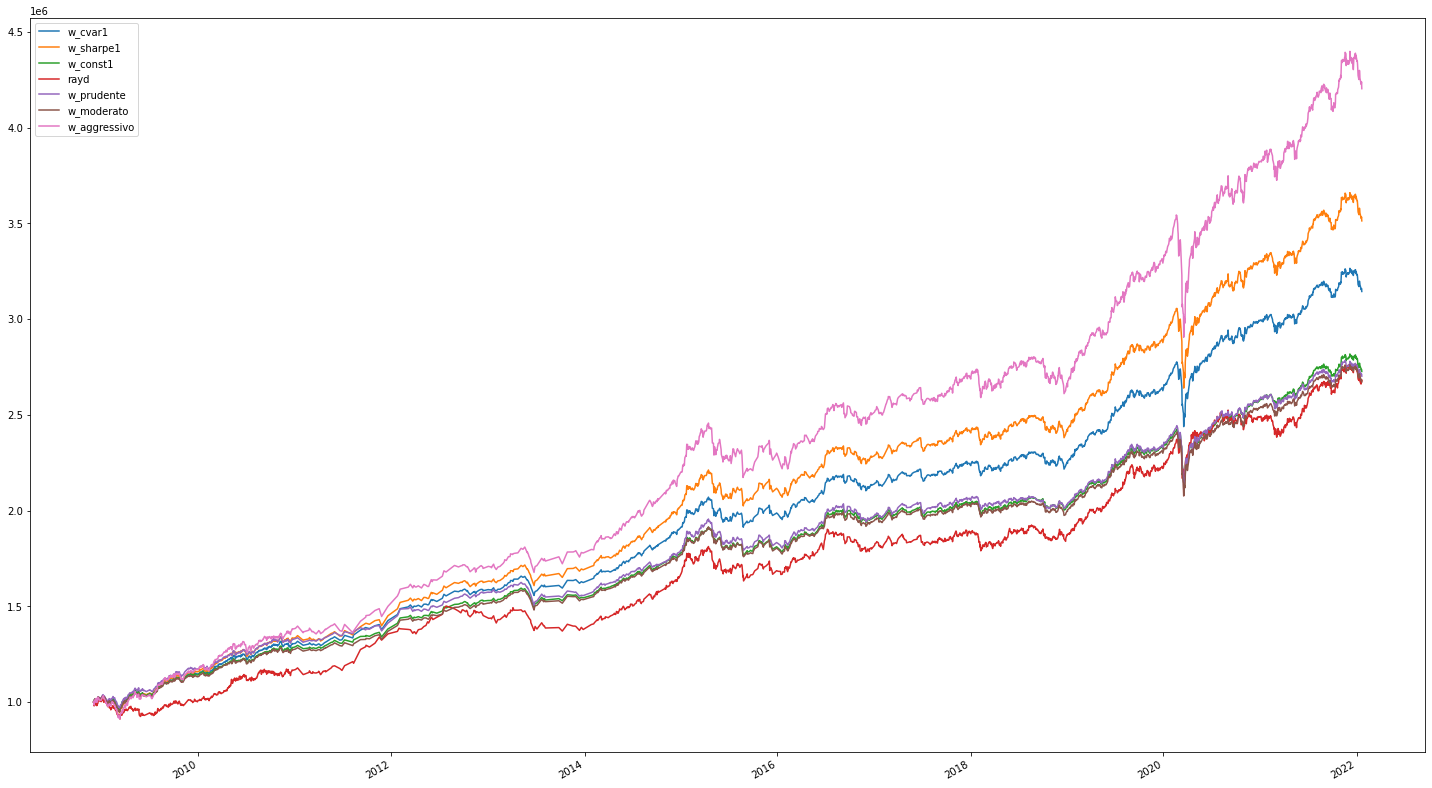

In [ ]:
wealth.plot(figsize=(25,15))

df['Cumulative'] = df.Profit.cumsum().round(2)
df['HighValue'] = df['Cumulative'].cummax()

df['Drawdown'] = df['Cumulative'] - df['HighVal']

In [ ]:
#w_name= [w_cvar1,w_sharpe1, w_const1, w_const2,w_worst,rayd

In [ ]:
w_tot= [w_cvar1,w_sharpe1, w_const1,rayd, w_prudente, w_moderato, w_aggressivo]
cs=pd.concat(w_tot, axis=1)

In [ ]:
cs.to_csv('output1.csv',sep=";")

In [ ]:
wealth

,w_cvar1,w_sharpe1,w_const1,rayd,w_prudente,w_moderato,w_aggressivo
2008-11-30,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2008-12-01,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2008-12-02,9.964175e+05,9.949578e+05,1.003242e+06,9.797872e+05,1.000663e+06,9.978744e+05,9.838645e+05
2008-12-03,1.007656e+06,1.007094e+06,1.010001e+06,9.850978e+05,1.009595e+06,1.008028e+06,9.994734e+05
2008-12-04,1.014509e+06,1.013938e+06,1.014442e+06,1.000277e+06,1.015306e+06,1.014837e+06,1.010255e+06
...,...,...,...,...,...,...,...
2022-01-14,3.179693e+06,3.554511e+06,2.757186e+06,2.675647e+06,2.725522e+06,2.701050e+06,4.259386e+06
2022-01-18,3.160042e+06,3.532198e+06,2.741207e+06,2.661191e+06,2.711661e+06,2.684599e+06,4.230300e+06
2022-01-19,3.153983e+06,3.526102e+06,2.733788e+06,2.669247e+06,2.708908e+06,2.679852e+06,4.226316e+06
2022-01-20,3.160083e+06,3.534126e+06,2.737264e+06,2.684444e+06,2.713226e+06,2.682720e+06,4.239750e+06


In [ ]:
wealth_max=wealth.cummax()

In [ ]:
dd= wealth - wealth_max

<AxesSubplot:>

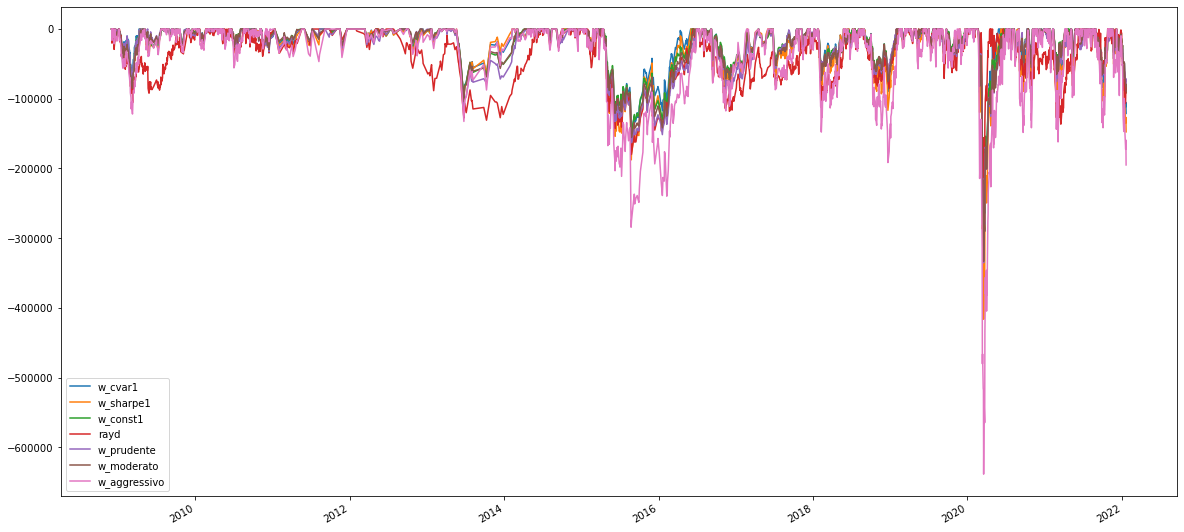

In [ ]:
dd.plot(figsize=(20,10))

<AxesSubplot:title={'center':'Max Drawdown during Covid19 Outbreak'}>

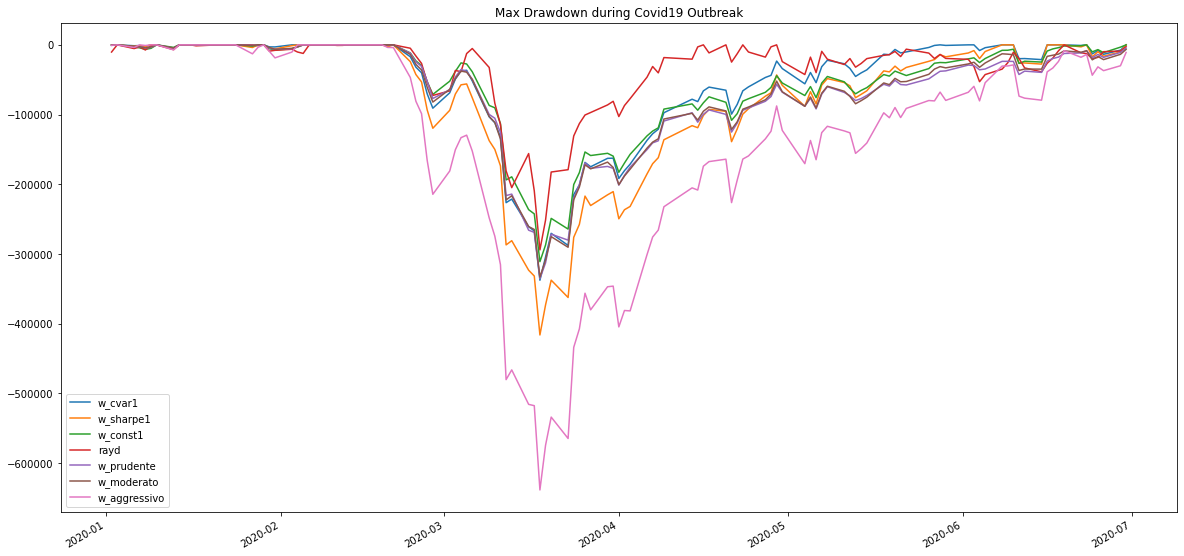

In [ ]:
dd['2020':'06/2020'].plot(figsize=(20,10), title='Max Drawdown during Covid19 Outbreak')

<AxesSubplot:title={'center':'Max Drawdown during Euro Crisis'}>

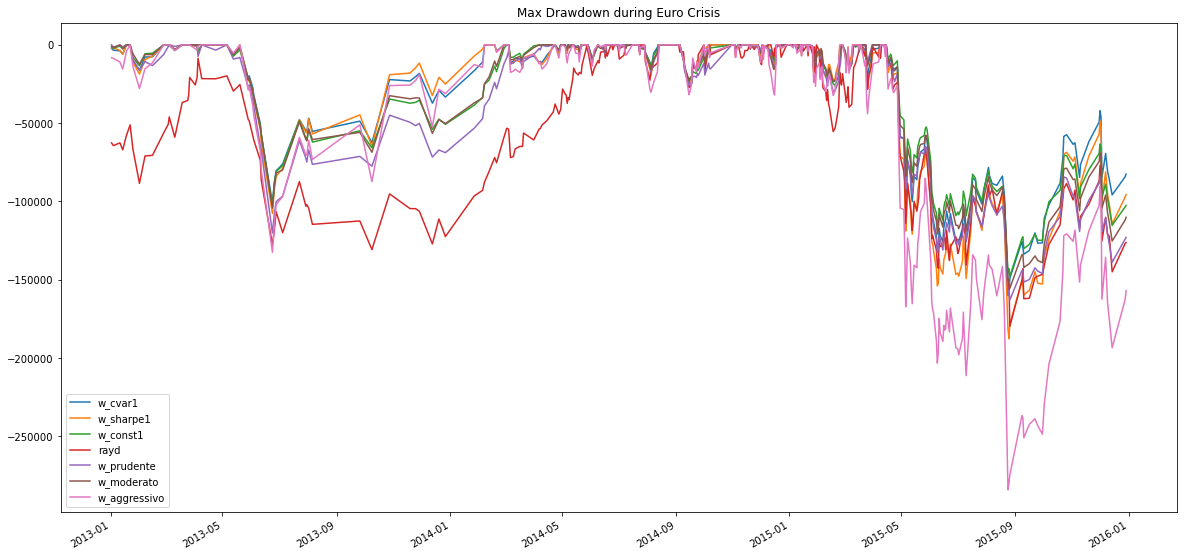

In [ ]:
dd['2013':'2015'].plot(figsize=(20,10), title='Max Drawdown during Euro Crisis')

<AxesSubplot:title={'center':'Max Drawdown during Subrime Crisis'}>

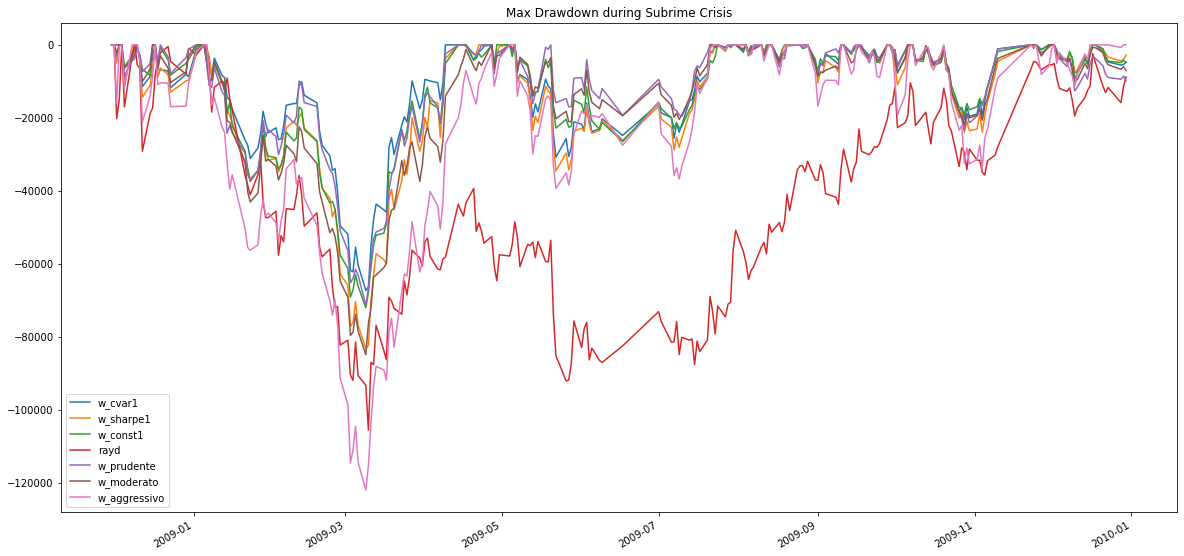

In [ ]:
dd['2008':'2009'].plot(figsize=(20,10), title='Max Drawdown during Subrime Crisis')

In [ ]:
s.to_csv('Stats1.csv',sep=";")

In [ ]:
dd.to_csv('drawdown.csv',sep=";")

In [ ]:
wealth.to_csv('wealth.csv',sep=";")